<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_AD_Boston/blob/main/Ejercicios_AD_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [1]:
import pydot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import Image
from io import StringIO
from joblib import dump

# Preproceso.

## Importacion de los datos del dataset.

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_housing = pd.read_csv('BostonHousing.csv', header=None, delimiter=r"\s+", names=column_names)

## Mostrar las primeras y ultimas filas del dataframe importado.

In [3]:
boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## Modificaciones de los datos.

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [5]:
boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [7]:
boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Mostrar un mapa de calor que indique la correlación entre variables.

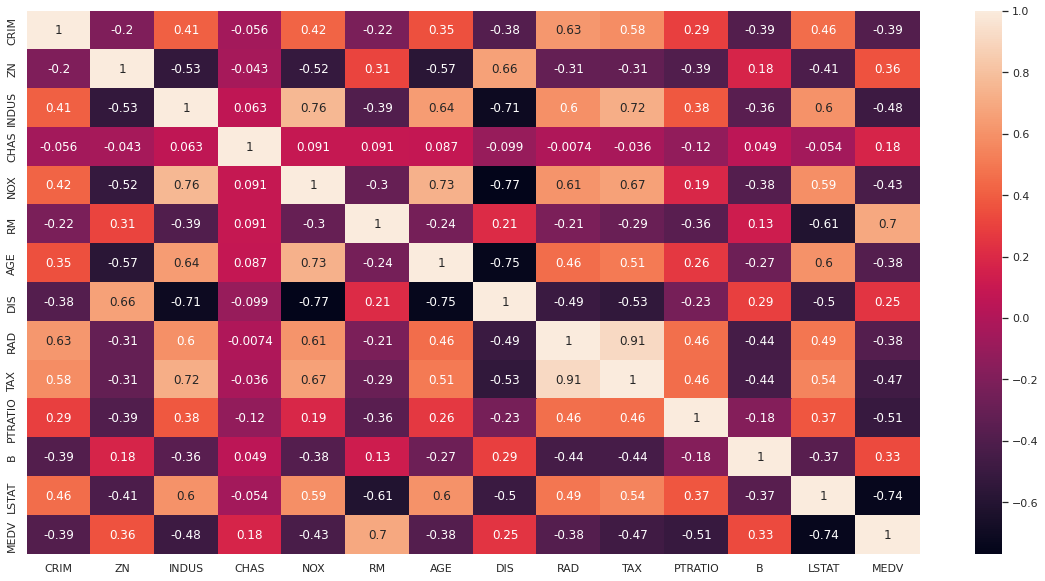

In [8]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(boston_housing.corr(), annot=True)

## Seleccionar las características a tener en cuenta en el estudio.

In [9]:
caracteristicas = ['LSTAT', 'PTRATIO', 'RM']
resultado = ['MEDV']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [10]:
x_boston_housing = boston_housing[caracteristicas]
y_boston_housing = boston_housing[resultado]

## Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_boston_housing, y_boston_housing, test_size=0.20)

# Optimización de hiperparámetros.

## Validación cruzada.

In [12]:
def validacion_cruzada(max_depth, x_train, y_train, criterion):
  kf = KFold(n_splits=5)

  model = DecisionTreeRegressor(max_depth = max_depth, criterion = criterion)
  scores = []

  for train_fold, test_fold in kf.split(x_train):
    model.fit(x_train.values[train_fold], y_train.values[train_fold].ravel())
    y_predict = model.predict(x_train.values[test_fold])
    scores.append(mean_absolute_error(y_train.values[test_fold], y_predict))
  return np.mean(scores)


In [13]:
resultados = []
for criterion in range(4):
  for max_depth in range(1, 16):
    if criterion == 0:
      resultados.append((validacion_cruzada(max_depth, x_train, y_train, 'squared_error'), max_depth, 'squared_error'))
    elif criterion == 1:
      resultados.append((validacion_cruzada(max_depth, x_train, y_train, 'friedman_mse'), max_depth, 'friedman_mse'))
    elif criterion == 2:
      resultados.append((validacion_cruzada(max_depth, x_train, y_train, 'absolute_error'), max_depth, 'absolute_error'))
    elif criterion == 3:
      resultados.append((validacion_cruzada(max_depth, x_train, y_train, 'poisson'), max_depth, 'poisson'))

mejor_resultado = min(resultados)
print(mejor_resultado)

(3.1246303875337746, 4, 'friedman_mse')


# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [14]:
model = DecisionTreeRegressor(max_depth = mejor_resultado[1], criterion = mejor_resultado[2])

## Realizar una predicción con los datos de prueba.

In [15]:
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)

In [16]:
y_predict = model.predict(x_test)

## Mostrar el árbol de decisión resultante.

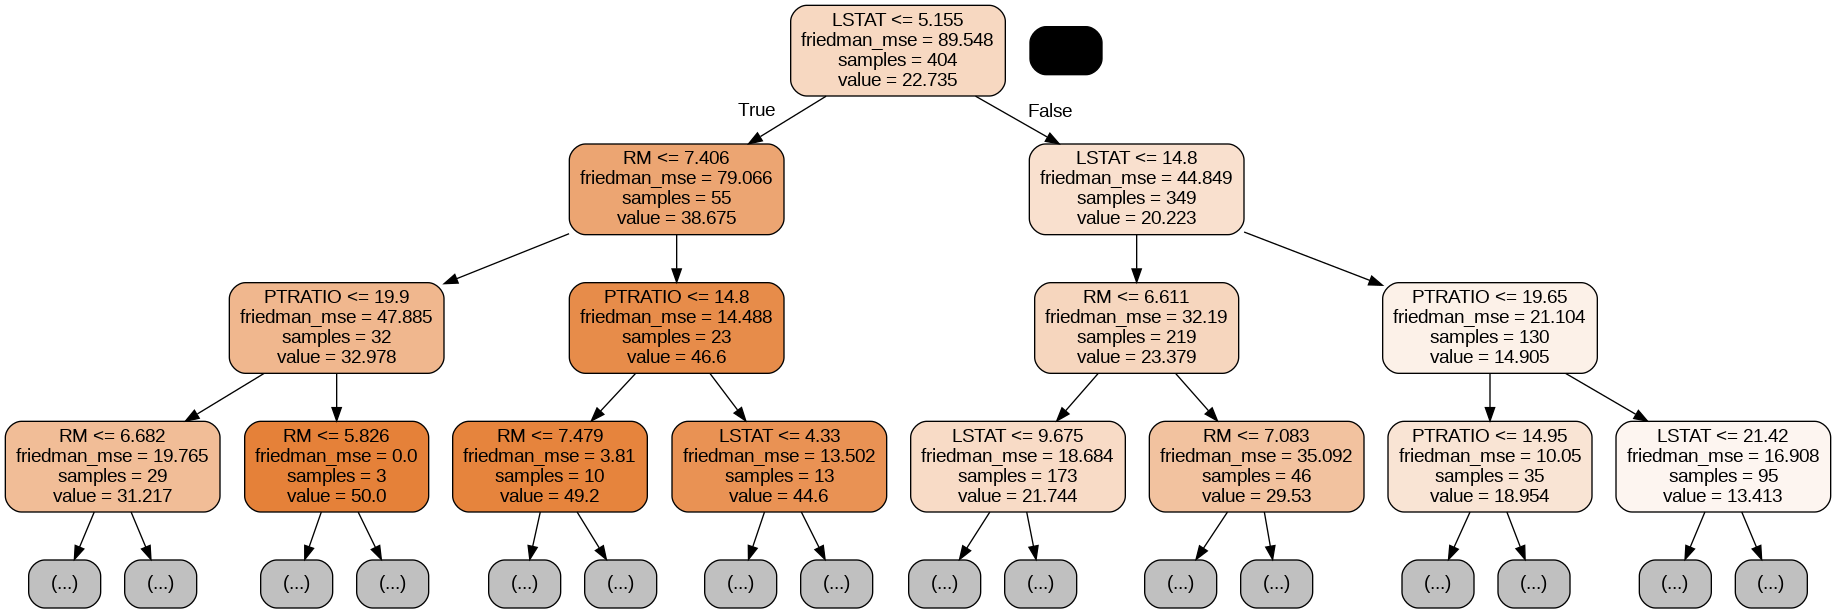

In [24]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, class_names = 'MEDV', feature_names = x_train.columns, rounded = True, filled = True, max_depth = 3)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Mostrar la importancia de cada atributo en el árbol resultante.

In [25]:
pd.DataFrame({'Attributes': ('LSTAT', 'PTRATIO', 'RM'), 'Decision Tree': model.feature_importances_ })

,Attributes,Decision Tree
0,LSTAT,0.754594
1,PTRATIO,0.065487
2,RM,0.179919


## Intenta guardar el modelo de predicción ya entrenado usando dump

In [19]:
dump(model, 'modelos_entrenado.AD_Boston')

['modelos_entrenado.AD_Boston']

# Evaluación.

## Mostrar el error cuadrático medio

In [20]:
mean_squared_error(y_test, y_predict)

11.382628249787981

## Mostrar el error absoluto medio

In [21]:
mean_absolute_error(y_test, y_predict)

2.4399682465971946

##  Representar gráficamente los valores predichos con los valores reales.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


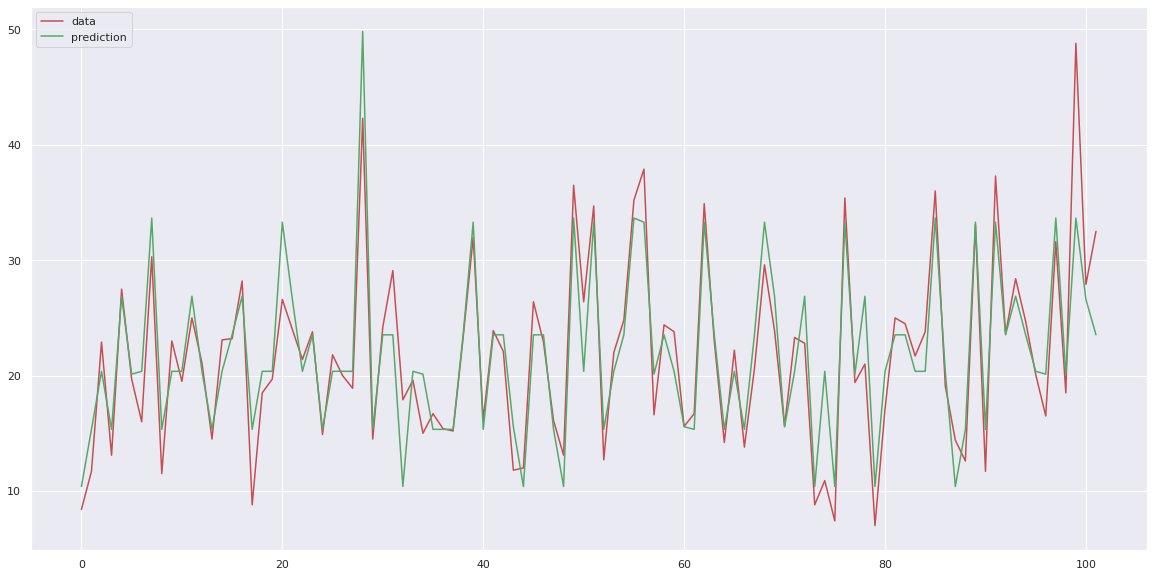

In [22]:
plt.figure(figsize=(20,10))
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_predict, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()
